# Importing libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage import data
from skimage.data import camera
from skimage.data import lily
from skimage.util import compare_images

from skimage import color
from skimage import io

import cv2
from google.colab import files
from google.colab import drive

from sklearn import svm
from sklearn.cluster import KMeans


# Uploading and displaying image

In [99]:
# Function to upload an image
def upload_image():
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
    return list(uploaded.keys())[0]


# Function to display an image
def display_image(img, title="Image", cmap_type='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [100]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


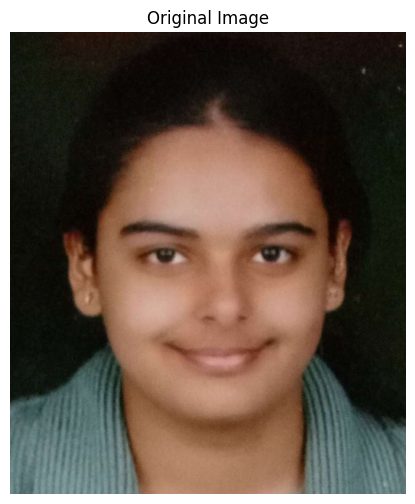

In [101]:
# Set the correct path to the image file in Google Drive
image_path = '/content/drive/My Drive/Photo (1).jpg'

# Function to display an image
def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read and display the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = np.array(image, dtype=np.uint8) # Converting to 8bit
if image is not None:
    display_image(image, "Original Image")
else:
    print("Error loading image!")

In [102]:
# Converting to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

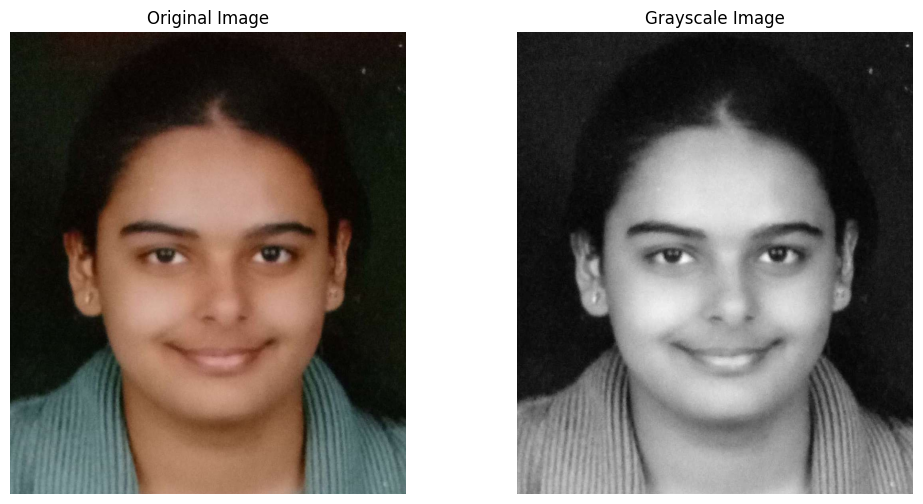

In [103]:
# Display the original and grayscale images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

# Applying edge detection algorithms
Five edge deteciton algorithms were used namely: Sobel, Canny, Prewitt, Roberts, Zero crossing

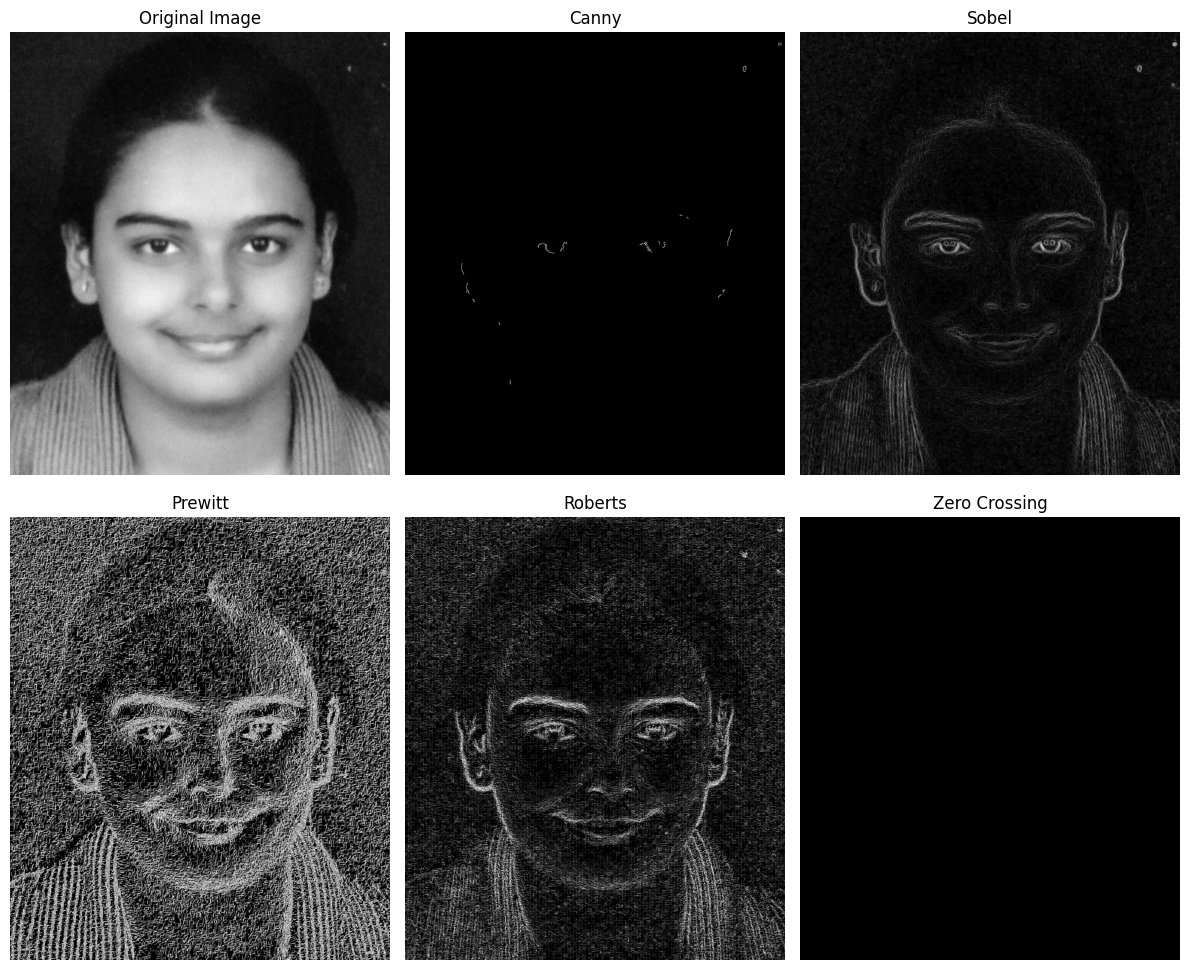

In [104]:
# Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Sobel Edge Detection
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobelx, sobely)

# Prewitt Operator
prewitt_kernel_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_image, -1, prewitt_kernel_y)
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2).astype(np.uint8)

# Roberts Cross Operator
roberts_kernel_x = np.array([[1, 0],
                             [0, -1]])
roberts_kernel_y = np.array([[0, 1],
                             [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_image, -1, roberts_kernel_y)
roberts_edges = np.sqrt(roberts_x**2 + roberts_y**2).astype(np.uint8)

# Laplacian of Gaussian (LoG)
gaussian_blur = cv2.GaussianBlur(gray_image, (3, 3), 0)
laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
log_edges = np.absolute(laplacian).astype(np.uint8)

# Zero Crossing Edge Detection
zero_crossing = cv2.threshold(log_edges, 50, 255, cv2.THRESH_BINARY)[1]

# Display the original image and the edge-detected images
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(zero_crossing, cmap='gray')
plt.title('Zero Crossing')
plt.axis('off')

plt.tight_layout()
plt.show()

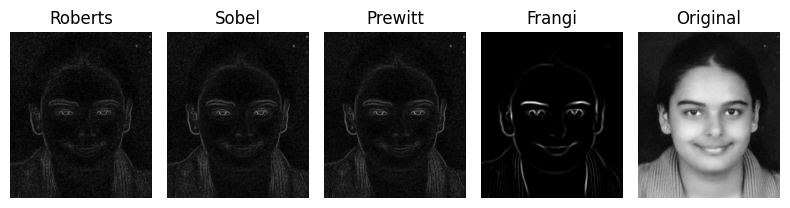

In [105]:

edge_roberts = filters.roberts(gray_image)
edge_sobel = filters.sobel(gray_image)
edge_hessian = filters.hessian(gray_image)
edge_prewitt = filters.prewitt(gray_image)
edge_gau = filters.frangi(gray_image)

fig, axes = plt.subplots(ncols=5, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('Prewitt')

axes[3].imshow(edge_gau, cmap=plt.cm.gray)
axes[3].set_title('Frangi')

axes[4].imshow(gray_image, cmap=plt.cm.gray)
axes[4].set_title('Original')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Canny

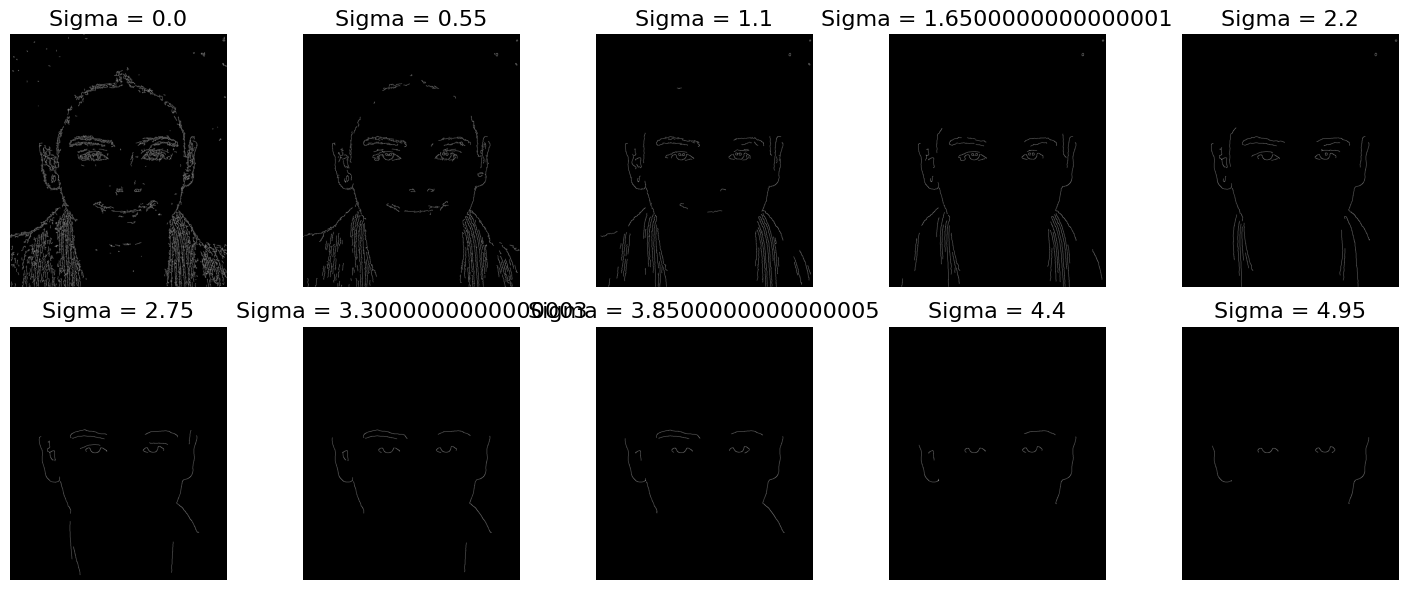

In [106]:
edges =[]

from skimage import feature
for i in [0.55*i for i in range(1,11)]:
    edges.append(feature.canny(gray_image, sigma=i))

fig, axes = plt.subplots(figsize=(15,6),nrows=2, ncols=5, sharex=True, sharey=True)

for i in range(10):
    axes.flat[i].imshow(edges[i],cmap=plt.cm.gray)
    axes.flat[i].set_axis_off()
    axes.flat[i].set_title("Sigma = {}".format(0.55*i),fontsize=16)
fig.tight_layout()
plt.show()

We see that the image with sigma=2.75 is the best segmented photo.

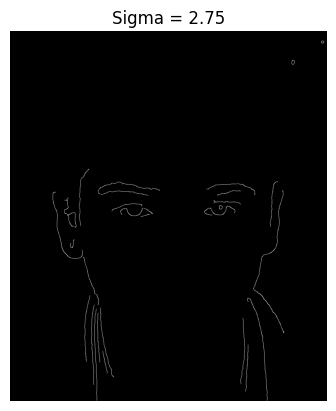

In [107]:
# Apply Canny edge detection with sigma = 2.75
sigma_value = 2.75
edge_image_canny = feature.canny(gray_image, sigma=sigma_value)

# Display the segmented image
plt.imshow(edge_image_canny, cmap=plt.cm.gray)
plt.axis('off')
plt.title("Sigma = {}".format(sigma_value))
plt.show()

# Save the segmented image
#plt.imsave("segmented_image.png", segmented_image, cmap=plt.cm.gray)

# Segmentation
Three methods for segementation were used - K-means, SVM and Deep learning - CNN

## K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


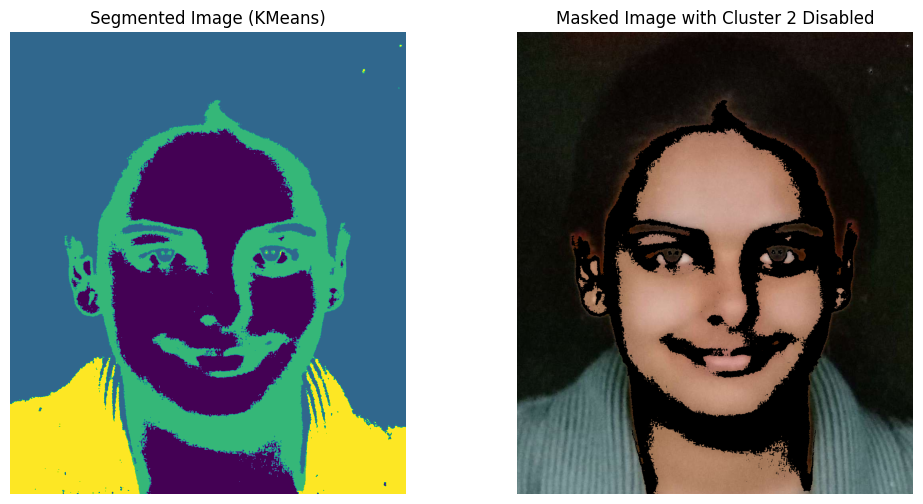

In [108]:
# Load the image (assuming the variable 'image' is already defined)
# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pixels)

# Get the labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Reshape the labels to the original image shape
segmented_image_kmeans = labels.reshape(image.shape[0], image.shape[1])

# Create a copy of the original image to apply the mask
masked_image = np.copy(image)

# Disable (black out) cluster number 2
cluster_to_disable = 2
masked_image[segmented_image_kmeans == cluster_to_disable] = [0, 0, 0]

# Display the original segmented image and the masked image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(segmented_image_kmeans, cmap='viridis')
plt.title('Segmented Image (KMeans)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title('Masked Image with Cluster 2 Disabled')
plt.axis('off')

plt.show()

## SVM

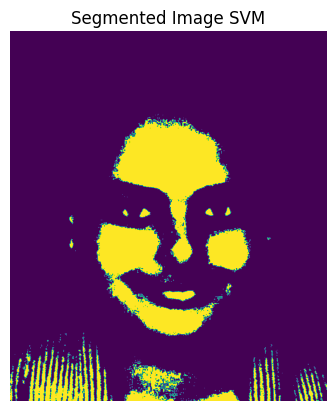

In [109]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Step 2: Labeling

# Define a threshold value to separate foreground and background
threshold_value = 128

# Convert the image to grayscale for thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Thresholding: Assign foreground class label to pixels with intensity above the threshold
foreground_label = 1
background_label = 0
labels = np.where(gray_image > threshold_value, foreground_label, background_label)

# Flatten the labels array to make it 1D
labels_flat = labels.flatten()

# Step 3: Training

# Train an SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(pixels, labels_flat)

# Step 4: Prediction

# Apply trained classifier to the same image for segmentation
predicted_labels = clf.predict(pixels)

# Step 5: Post-processing

# Reshape predicted labels to match image dimensions
segmented_image_svm = predicted_labels.reshape(image.shape[:2])

# Step 6: Display Segmented Image

# Display segmented image
plt.imshow(segmented_image_svm, cmap='viridis')
plt.title('Segmented Image SVM')
plt.axis('off')
plt.show()

## Deep learning - CNN

1/1 [==============================] - 1s 612ms/step


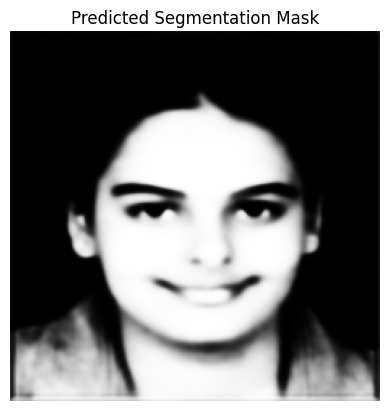

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, transform
from tensorflow.keras import layers, models
import cv2

# Function to create a minimal U-Net model with only 2 convolutional layers
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)

    # Decoder
    up1 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv2))
    merge1 = layers.concatenate([conv1, up1], axis=3)
    conv3 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge1)
    conv4 = layers.Conv2D(1, 1, activation='sigmoid')(conv3)

    model = models.Model(inputs=inputs, outputs=conv4)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Generate synthetic data
def generate_synthetic_data(image, num_samples=1000):
    X = np.zeros((num_samples, 256, 256, 1))
    Y = np.zeros((num_samples, 256, 256, 1))

    for i in range(num_samples):
        noise = np.random.random((256, 256)) * 0.1
        noisy_image = image + noise

        mask = noisy_image > 0.5  # Simple thresholding to create synthetic segmentation mask
        X[i, :, :, 0] = noisy_image
        Y[i, :, :, 0] = mask

    return X, Y

# Load sample image and convert to grayscale
image_path = '/content/drive/My Drive/Photo (1).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Image at path {image_path} could not be loaded. Please check the file path.")

# Convert to float and resize
image = image.astype(np.float32) / 255.0
gray_image = transform.resize(image, (256, 256))

# Generate synthetic data
X_train, Y_train = generate_synthetic_data(gray_image)

# Create and train the model
model = unet_model()
model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

# Predict segmentation mask for the input image
predicted_mask = model.predict(gray_image[np.newaxis, :, :, np.newaxis])

# Display the predicted segmentation mask
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
plt.title('Predicted Segmentation Mask')
plt.axis('off')
plt.show()


# Edge detection on segmented image
The image which was segmented using the deep learning technique has been used for edge detection.

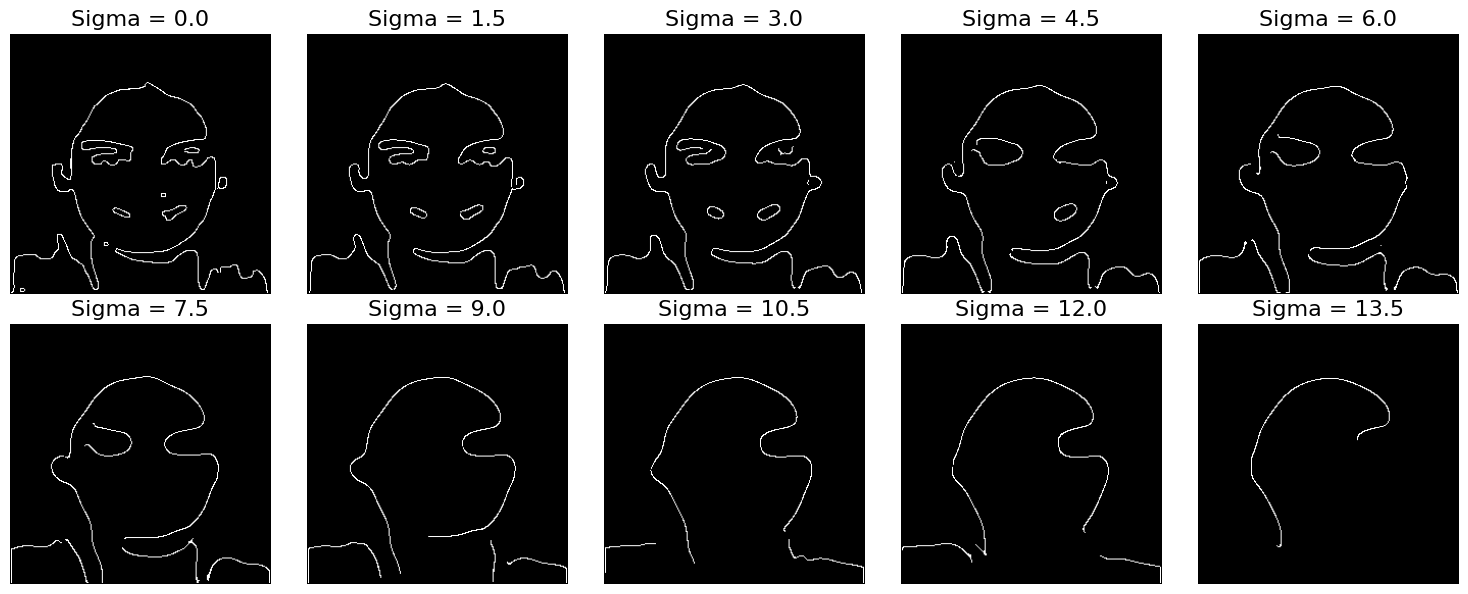

In [119]:
# Convert the predicted mask to binary format
segmented_image_dl = (predicted_mask[0, :, :, 0] > 0.5).astype(np.uint8) * 255

# Perform Canny edge detection
edges = cv2.Canny(segmented_image_dl, 100, 200)

edges =[]

from skimage import feature
for i in [1.5*i for i in range(1,11)]:
    edges.append(feature.canny(segmented_image_dl, sigma=i))

fig, axes = plt.subplots(figsize=(15,6),nrows=2, ncols=5, sharex=True, sharey=True)

for i in range(10):
    axes.flat[i].imshow(edges[i],cmap=plt.cm.gray)
    axes.flat[i].set_axis_off()
    axes.flat[i].set_title("Sigma = {}".format(1.5*i),fontsize=16)
fig.tight_layout()
plt.show()

# Extra features


## Making the edges red

The image with sigma=12 was used as the final image for further processing.



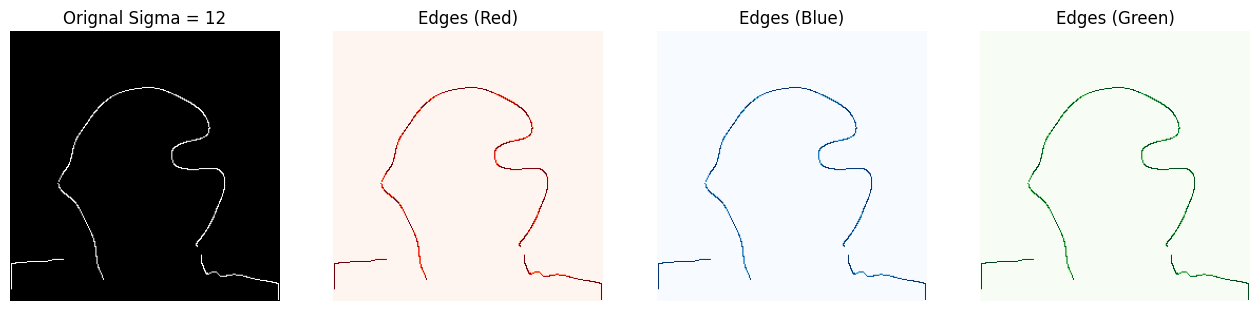

In [120]:
# Apply Canny edge detection with sigma = 2.75
sigma_value = 12
edge_image_canny_final = feature.canny(segmented_image_dl, sigma=sigma_value)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Display the segmented image
axes[0].imshow(edge_image_canny_final, cmap=plt.cm.gray)
axes[0].axis('off')
axes[0].set_title("Orignal Sigma = {}".format(sigma_value))

# Display the edges with different colors for visualization
axes[1].imshow(edge_image_canny_final, cmap='Reds')
axes[1].axis('off')
axes[1].set_title("Edges (Red)")

axes[2].imshow(edge_image_canny_final, cmap='Blues')
axes[2].axis('off')
axes[2].set_title("Edges (Blue)")

axes[3].imshow(edge_image_canny_final, cmap='Greens')
axes[3].axis('off')
axes[3].set_title("Edges (Green)")

plt.show()

## Adding signature

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
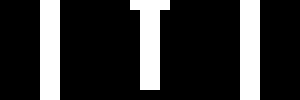

In [113]:
# Create an initial I
I = np.zeros((100, 100, 3), dtype=np.uint8)
I[:, 40:60] = [255, 255, 255]  # Set to white color

# Create an initial T
T = np.zeros((100, 100, 3), dtype=np.uint8)
T[10:90, 40:60] = [255, 255, 255]  # Set to white color
T[0:10, 30:70] = [255, 255, 255]  # Set to white color

# Create an initial I
I2 = np.zeros((100, 100, 3), dtype=np.uint8)
I2[:, 40:60] = [255, 255, 255]  # Set to white color

# Combine the letters horizontally
ITI = np.concatenate((I, T, I2), axis=1)

ITI


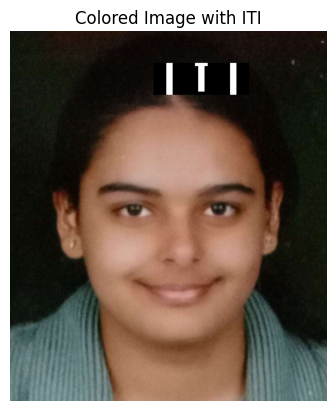

In [114]:
image_path = '/content/drive/My Drive/Photo (1).jpg'

# Function to display an image
def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Read and display the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = np.array(image, dtype=np.uint8) # Converting to 8bit

# Define the position to impose the ITI image on the colored image
x_offset = 450
y_offset = 100



# Superimpose the ITI image on the colored image
colored_image_with_ITI = image.copy()
colored_image_with_ITI[y_offset:y_offset + ITI.shape[0], x_offset:x_offset + ITI.shape[1]] = ITI

# Display the colored image with ITI
plt.imshow(cv2.cvtColor(colored_image_with_ITI, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Colored Image with ITI')
plt.show()